In [1]:
import numpy as np
import capytaine as cpt
from hinge_barge import HingeBarge, RectangleParams

In [2]:
# Which version of Capytaine has been used
cpt.__version__

'1.1'

In [3]:
resolution = 10  # in panels per meter

body_1_params = RectangleParams(
    name="body_1",
    shape=(0.68, 0.4, 0.1),
    geometric_center=(0.0, 0.0, 0.0),
    center_of_mass=(0.0, 0.0, -0.025),
    resolution=resolution,
)

body_2_params = RectangleParams(
    name="body_2",
    shape=(0.68, 0.4, 0.1),
    geometric_center=(0.0, 0.0, 0.0),
    center_of_mass=(0.0, 0.0, 0.0),
    resolution=resolution,
)

damping_plate_params = RectangleParams(
    name="damping_plate",
    shape=(0.48, 0.4, 0.01),
    geometric_center=(0.0, 0.0, -0.227),
    center_of_mass=(0.0, 0.0, -0.227),
    resolution=resolution,
)

body_3_params = RectangleParams(
    name="body_3",
    shape=(1.00, 0.4, 0.10),
    geometric_center=(0.0, 0.0, 0.0),
    center_of_mass=(0.0, 0.0, -0.025),
    resolution=resolution,
)

In [4]:
hb = HingeBarge(
    bodies=[[body_1_params], [body_2_params, damping_plate_params], [body_3_params]],
    dofs_names=["Surge", "Sway", "Heave", "Roll", "Pitch", "Yaw", "body_1__Relative_Pitch", "body_3__Relative_Pitch"],
    distance_between_bodies=0.06,
)

In [5]:
hb.compute_hydrostatics(rho_water=1025.0)
hb.mass

<xarray.DataArray (influenced_dof: 8, radiating_dof: 8)>
array([[ 49.364     ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,  49.364     ,   0.        ,   0.        ,
          0.        ,  61.44752   ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  49.364     ,   0.        ,
        -61.44752   ,   0.        ,   5.1578    , -10.865     ],
       [  0.        ,   0.        ,   0.        ,   0.77074107,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        , -61.44752   ,   0.        ,
        102.30110747,   0.        ,  -1.19616817,  23.25092917],
       [  0.        ,  61.44752   ,   0.        ,   0.        ,
          0.        , 102.84673973,   0.        ,   0.        ],
       [  0.        ,   0.        ,   5.1578    ,   0.        ,
         -1.19616817,   0.        ,   2.46586983,   0.        ],
       [  0.        ,   0.        , -10.865     ,   0.        ,
         23.25092917,   0.        ,   0.        ,   7.49667917]])
Coordinates:
  * influenced_dof  (influenced_dof) <U22 'Surge' ... 'body_3__Relative_Pitch'
  * radiating_dof   (radiating_dof) <U22 'Surge' ... 'body_3__Relative_Pitch'

In [6]:
hb.compute_hydrodynamics(
    omega_range=np.linspace(2, 6, 30),
    wave_direction_range=[0.0],
    rho_water=1025.0,
)
hb.dataset["added_mass"].sel(omega=2.0)

<xarray.DataArray 'added_mass' (radiating_dof: 8, influenced_dof: 8)>
array([[ 5.58872159e+00,  6.10852099e-07, -1.05897283e-01,
         3.17650799e-06,  7.98668922e+00,  1.04016473e-06,
         1.77734854e+00,  2.97734848e+00],
       [-2.34802446e-07,  2.19897884e+01, -1.23754430e-04,
        -2.19500284e+00,  1.50524548e-04,  2.73612737e+01,
        -1.30262719e-05,  2.49020388e-05],
       [-1.45194864e-01, -2.73367671e-07,  3.34534235e+02,
        -1.42223508e-06, -4.17213452e+02, -4.65421256e-07,
         2.98038631e+01, -6.74197792e+01],
       [ 1.95797106e-07, -1.41880185e+00,  1.73736190e-04,
         1.31383960e+00, -2.14388940e-04, -1.82831821e+00,
         1.72152409e-05, -3.55102506e-05],
       [ 5.49136579e+00,  5.43877620e-07, -4.17604336e+02,
         2.82901929e-06,  6.36832463e+02,  9.26020604e-07,
        -1.52144779e+01,  1.27778802e+02],
       [ 5.28398191e-07,  2.73619910e+01,  3.89902311e-04,
        -2.78910945e+00, -4.76798792e-04,  4.43070073e+01,
         3.99055322e-05, -7.90964005e-05],
       [ 1.17070105e+00,  9.42329153e-09,  2.97030611e+01,
         4.91908014e-08, -1.50682581e+01,  1.60569714e-08,
         9.64229132e+00, -7.37131016e-01],
       [ 2.08651882e+00,  8.39105418e-08, -6.75220571e+01,
         4.36236395e-07,  1.27874361e+02,  1.42850742e-07,
        -7.52260024e-01,  3.49898229e+01]])
Coordinates:
  * influenced_dof  (influenced_dof) object 'Surge' ... 'body_3__Relative_Pitch'
  * radiating_dof   (radiating_dof) object 'Surge' ... 'body_3__Relative_Pitch'
    rho             float64 1.025e+03
    body_name       <U11 'hinge_barge'
    omega           float64 2.0
    g               float64 9.81
    water_depth     float64 inf

In [7]:
hb.compute_motion(
    wave_amplitude=0.02,
    pto={
        'body_1__Relative_Pitch': 10,
        'body_3__Relative_Pitch': 16,
    },
    viscous_dissipation=None,
)
hb.dataset["motion"].sel(omega=2.0)

<xarray.DataArray 'motion' (wave_direction: 1, radiating_dof: 8)>
array([[-2.06603891e-02+2.17268448e-02j,  1.60732612e-06+5.25458942e-07j,
         7.65109364e-02+3.54593857e-03j,  5.02574891e-07+3.83430519e-08j,
         2.79478629e-02-3.44077510e-04j, -1.16581582e-06-3.66655709e-07j,
         2.76015058e-01-1.50525192e-01j, -1.50938628e-02+1.18369765e-03j]])
Coordinates:
  * wave_direction  (wave_direction) float64 0.0
  * radiating_dof   (radiating_dof) <U22 'Surge' ... 'body_3__Relative_Pitch'
    rho             float64 1.025e+03
    body_name       <U11 'hinge_barge'
    omega           float64 2.0
    g               float64 9.81
    water_depth     float64 inf

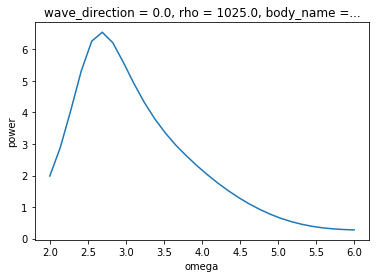

In [8]:
hb.compute_power().plot()